In [39]:
#Libraries
import requests
import lxml.html as lh
import pandas as pd

import matplotlib.pyplot as plt

In [40]:
url='https://www.expansion.com/mercados/cotizaciones/indices/ibex35_I.IB.html'

#Create a handle, page, to handle the contents of the website
page = requests.get(url)

#Store the contents of the website under doc
doc = lh.fromstring(page.content)

#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

#print('sucess')

In [41]:
#set dataframe contex
col_names = ['Valor', 'Ultimo', 'Variacion (%)', 'Variacion', 'Variacion Año', 'Max', 'Min', 'Volumen', 'Capitalizacion (Mil-Mill)']
df_IBEX35 = pd.DataFrame(columns = col_names )

for vv in range(18,52+1):
    col=[]    
    #For each row, store each first element (header) and an empty list
    for t in tr_elements[vv][0:9]: #de 18 a 52 --> for each value do:
        name=t.text_content()
        col.append(name)
        
        #set values in appropiate format
        coll = [x.replace('.','').replace(',','.') for x in col]  #first remove '.' and then susbtitute ',' for '.'
        
    #set dataframe for each value
    df = pd.DataFrame(columns = col_names )
    df.loc[0] = coll
        
    #Incorporate last value on IBEX35 df
    df_IBEX35 = df_IBEX35.append(df)
    

df_IBEX35 = df_IBEX35.set_index('Valor')

In [42]:
df_IBEX35

,Ultimo,Variacion (%),Variacion,Variacion Año,Max,Min,Volumen,Capitalizacion (Mil-Mill)
Valor,,,,,,,,
ACCIONA,116.000,1.75,2.00,26.34,116.700,114.100,154447,6363
ACERINOX,9.182,0.90,0.08,-3.35,9.196,9.054,767164,2484
ACS,26.720,-0.89,-0.24,-18.61,27.200,26.640,564728,8301
AENA,138.300,-0.43,-0.60,-18.89,139.800,137.900,149253,20745
ALMIRALL,11.050,-0.72,-0.08,-22.88,11.230,11.040,419323,1968
AMADEUS IT GROUP,60.280,2.17,1.28,-16.58,60.580,58.580,1000100,27156
ARCELORMITTAL,19.272,1.97,0.37,23.38,19.580,19.088,623091,21253
BANCO SABADELL,0.361,-2.46,-0.01,-63.69,0.375,0.361,39843344,2034
BANKIA,1.533,-0.81,-0.01,-9.37,1.561,1.524,3007428,4707


In [43]:
df_vv = df_IBEX35[['Variacion (%)','Volumen']]
df_vv

,Variacion (%),Volumen
Valor,,
ACCIONA,1.75,154447
ACERINOX,0.90,767164
ACS,-0.89,564728
AENA,-0.43,149253
ALMIRALL,-0.72,419323
AMADEUS IT GROUP,2.17,1000100
ARCELORMITTAL,1.97,623091
BANCO SABADELL,-2.46,39843344
BANKIA,-0.81,3007428


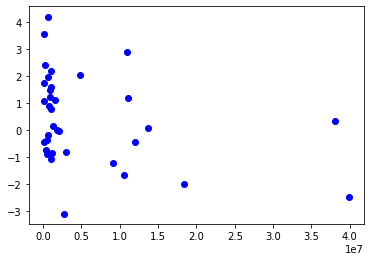

In [53]:
#volume vs variacion 
x = df_vv['Volumen'].astype(float)
y = df_vv['Variacion (%)'].astype(float)

plt.scatter(x , y, c = 'blue')